In [4]:
### Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import matplotlib.animation as animation

In [5]:
### Data Cleaning 
# Create Pandas Data Frame
df = pd.read_csv("indegocombined.csv", low_memory=False, na_values='')
# Combine One Day Pass and Day Pass for the sake of visualization since they are the same thing. 
df.replace(to_replace="One Day Pass", value="Day Pass")
# Change the start_time String to datetime format 
df['start_time'] = pd.to_datetime(df['start_time'])
# Extract the year 
df['year'] = df['start_time'].dt.year
pd.to_numeric(df['year'])
# Extract the months
df['month'] = df['start_time'].dt.month
pd.to_numeric(df['month'])

0          10
1          10
2          10
3          10
4          10
           ..
3123632     9
3123633     9
3123634     9
3123635     9
3123636     9
Name: month, Length: 3123637, dtype: int64

In [70]:

## Data Exploration and Grouping

# Split data into years
year2015 = df[df['year'] == 2015]
year2016 = df[df['year'] == 2016]
year2017 = df[df['year'] == 2017]
year2018 = df[df['year'] == 2018]
year2019 = df[df['year'] == 2019]

# Split years by passholdertype

#indego 30 
indego30_2015 = year2015[year2015['passholder_type'] == 'Indego30']
indego30_2016 = year2016[year2016['passholder_type'] == 'Indego30']
indego30_2017 = year2017[year2017['passholder_type'] == 'Indego30']
indego30_2018 = year2018[year2018['passholder_type'] == 'Indego30']
indego30_2019 = year2019[year2019['passholder_type'] == 'Indego30']

#indego 365
indego365_2015 = year2015[year2015['passholder_type'] == 'Indego365']
indego365_2016 = year2016[year2016['passholder_type'] == 'Indego365']
indego365_2017 = year2017[year2017['passholder_type'] == 'Indego365']
indego365_2018 = year2018[year2018['passholder_type'] == 'Indego365']
indego365_2019 = year2019[year2019['passholder_type'] == 'Indego365']

#daypass / walkup 
daypass_2015 = year2015[ (year2015['passholder_type'] == 'Walk-up') | (year2015['passholder_type'] == 'Day Pass') ]
daypass_2016 = year2016[ (year2016['passholder_type'] == 'Walk-up') | (year2016['passholder_type'] == 'Day Pass') ]
daypass_2017 = year2017[ (year2017['passholder_type'] == 'Walk-up') | (year2017['passholder_type'] == 'Day Pass') ]
daypass_2018 = year2018[ (year2018['passholder_type'] == 'Walk-up') | (year2018['passholder_type'] == 'Day Pass') ]
daypass_2019 = year2019[ (year2019['passholder_type'] == 'Walk-up') | (year2019['passholder_type'] == 'Day Pass') ]

# Get from October - December of prior years to predict 2019
octdec_2015 = year2015[ (year2015['month'] == 10) | (year2015['month'] == 11) | (year2015['month'] == 12)]
octdec_2016 = year2016[ (year2016['month'] == 10) | (year2016['month'] == 11) | (year2016['month'] == 12)]
octdec_2017 = year2017[ (year2017['month'] == 10) | (year2017['month'] == 11) | (year2017['month'] == 12)]
octdec_2018 = year2018[ (year2018['month'] == 10) | (year2018['month'] == 11) | (year2018['month'] == 12)]


# create lists for the total values of related data
# it is important to do as little math in a matplot as possible so we do the math here! 
counts = [len(year2015.index),len(year2016.index),len(year2017.index),len(year2018.index),len(year2019.index)]
counts_predict = [len(year2015.index),len(year2016.index),len(year2017.index),len(year2018.index),round(len(year2019.index) + avgoctdec)]
indego30_counts = [len(indego30_2015.index),len(indego30_2016.index),len(indego30_2017.index),len(indego30_2018.index),len(indego30_2019.index)]
daypass_counts = [len(daypass_2015.index),len(daypass_2016.index),len(daypass_2017.index),len(daypass_2018.index),len(daypass_2019.index)]
indego365_counts = [len(indego365_2015.index),len(indego365_2016.index),len(indego365_2017.index),len(indego365_2018.index),len(indego365_2019.index)]
octdec_counts = [int(len(octdec_2015)), int(len(octdec_2016)), int(len(octdec_2017)), int(len(octdec_2018))]
avgoctdec = sum(octdec_counts) / len(octdec_counts)

years = ['2015', '2016', '2017', '2018', '2019']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']


## Alternative way to get vlaue counts
#pass2015 = year2015['passholder_type'].value_counts()




In [73]:
avgoctdec = sum(octdec_counts) / len(octdec_counts)
avgoctdec

156170.75

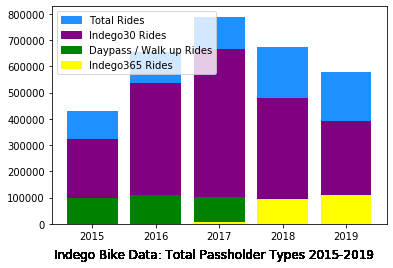

In [75]:
## Data Visualization


# Create patches and title text to prep for plotting
DodgerBlue_patch = mpatches.Patch(color='DodgerBlue', label='Total Rides')
Purple_patch = mpatches.Patch(color='Purple', label='Indego30 Rides')
Green_patch = mpatches.Patch(color='Green', label='Daypass / Walk up Rides')
Yellow_patch = mpatches.Patch(color='Yellow', label='Indego365 Rides')
txt = "Indego Bike Data: Total Passholder Types 2015-2019"


## Data Plotting

# Plot Total Rides
for counter, year in enumerate(years):
    plt.bar(year,counts[counter], color = 'DodgerBlue' ) #_predict
    plt.legend(handles=[DodgerBlue_patch], loc='upper left')
    plt.figtext(0.5, 0.007, txt, wrap=False,horizontalalignment='center', fontsize=12)
    plt.savefig(year+'.png')
    
# Plot indego30 rides
for counter, year in enumerate(years):
    plt.bar(year,indego30_counts[counter], color = 'Purple')
    plt.legend(handles=[DodgerBlue_patch,Purple_patch])
    plt.figtext(0.5, 0.007, txt, wrap=False,horizontalalignment='center', fontsize=12)
    plt.savefig(year+'indego30.png')

# Plot daypass / walkup rides
for counter, year in enumerate(years):
    plt.bar(year,daypass_counts[counter], color = 'Green')
    plt.legend(handles=[DodgerBlue_patch,Purple_patch,Green_patch])
    plt.figtext(0.5, 0.007, txt, wrap=False,horizontalalignment='center', fontsize=12)
    plt.savefig(year+'daypass.png')
    
# plot indego365 rides
for counter, year in enumerate(years):
    plt.bar(year,indego365_counts[counter], color = 'Yellow')
    plt.legend(handles=[DodgerBlue_patch,Purple_patch,Green_patch,Yellow_patch])
    plt.figtext(0.5, 0.007, txt, wrap=False,horizontalalignment='center', fontsize=12)
    plt.savefig(year+'indego365.png')
